In [ ]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
import statsmodels.api as sm

!pip install mord
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns

!pip install dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba import plotDecisionTree
from dmba.metric import AIC_score

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9886 sha256=098bc1dc4500acf1ff23b3a959e5d5694af6d7a7884563cb7a25d79b34099fb7
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 21.8 MB/s eta 0:00:00
Colab environment detected.


# **0. Business Case:**

*   PVA97NK.csv contains historical information from the last campaign soliciting donations for a non-profit organization supporting veterans.
*   The target variable, TARGET_B, indicates if the customer made a donation during the last campaign.  
*   Use the information provided in the dataset to make a prediction about the probability of a new donation as well as the drivers for that behaviour.

This project will contain 5 sections:
1. Data Preprocessing
2. CART (2 models)
3. Random Forest
4. Logistic Regression
5. Evaluation and Insights

Note 1: For this project, we will relax the requirement to impute missing values, cap and floor outliers, address skews and recode dummy variables.  These steps should be completed in your Capstone, but these are not part of the learning objectives being evaluated with this project, given the time constraints.

**Note 2: Use your Student ID number for all random states in this project.**


# **1. Data Preprocessing:**

*   Read the data and remove ID, TARGET_D, StatusCat96NK **and any variables that have at least one missing value.**
*   Create dummy variables for remaining categorical inputs.
*   Once you have completed preprocessing, generate head, column and shape information to describe your final processed data set.
* Follow the standard train_test_split procedure to split your data set using 60% training size.  Remember to use your Student ID number as the random seed for all random states in this project.






In [ ]:
donations = pd.read_csv('PVA97NK.csv')
donations.head()

,TARGET_B,ID,TARGET_D,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,0,14974,NaN,2,4,1,3,17.0,13.50,9.25,17.00,21,66,8,17,26,3,8,13,A,0,0,NaN,F,U,0.0,0,0.0
1,0,6294,NaN,1,8,0,3,20.0,20.00,15.88,NaN,26,92,14,35,79,5,5,24,A,0,23,67.0,F,U,186800.0,85,0.0
2,1,46110,$4.00,6,41,3,20,6.0,5.17,3.73,5.00,18,111,12,23,51,5,11,22,S,1,0,NaN,M,U,87600.0,36,38750.0
3,1,185937,$10.00,3,12,3,8,10.0,8.67,8.50,8.67,9,93,14,22,44,2,6,16,E,1,0,NaN,M,U,139200.0,27,38942.0
4,0,29637,NaN,1,1,1,1,20.0,20.00,20.00,20.00,21,21,10,15,13,4,7,6,F,0,35,53.0,M,U,168100.0,37,71509.0


In [ ]:
donations.columns

Index(['TARGET_B', 'ID', 'TARGET_D', 'GiftCnt36', 'GiftCntAll',
       'GiftCntCard36', 'GiftCntCardAll', 'GiftAvgLast', 'GiftAvg36',
       'GiftAvgAll', 'GiftAvgCard36', 'GiftTimeLast', 'GiftTimeFirst',
       'PromCnt12', 'PromCnt36', 'PromCntAll', 'PromCntCard12',
       'PromCntCard36', 'PromCntCardAll', 'StatusCat96NK', 'StatusCatStarAll',
       'DemCluster', 'DemAge', 'DemGender', 'DemHomeOwner', 'DemMedHomeValue',
       'DemPctVeterans', 'DemMedIncome'],
      dtype='object')

In [ ]:
donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TARGET_B          9686 non-null   int64  
 1   ID                9686 non-null   int64  
 2   TARGET_D          4843 non-null   object 
 3   GiftCnt36         9686 non-null   int64  
 4   GiftCntAll        9686 non-null   int64  
 5   GiftCntCard36     9686 non-null   int64  
 6   GiftCntCardAll    9686 non-null   int64  
 7   GiftAvgLast       9686 non-null   float64
 8   GiftAvg36         9686 non-null   float64
 9   GiftAvgAll        9686 non-null   float64
 10  GiftAvgCard36     7906 non-null   float64
 11  GiftTimeLast      9686 non-null   int64  
 12  GiftTimeFirst     9686 non-null   int64  
 13  PromCnt12         9686 non-null   int64  
 14  PromCnt36         9686 non-null   int64  
 15  PromCntAll        9686 non-null   int64  
 16  PromCntCard12     9686 non-null   int64  


### Dropping variables and missing values

In [ ]:
donations.isnull().sum()

TARGET_B               0
ID                     0
TARGET_D            4843
GiftCnt36              0
GiftCntAll             0
GiftCntCard36          0
GiftCntCardAll         0
GiftAvgLast            0
GiftAvg36              0
GiftAvgAll             0
GiftAvgCard36       1780
GiftTimeLast           0
GiftTimeFirst          0
PromCnt12              0
PromCnt36              0
PromCntAll             0
PromCntCard12          0
PromCntCard36          0
PromCntCardAll         0
StatusCat96NK          0
StatusCatStarAll       0
DemCluster             0
DemAge              2407
DemGender              0
DemHomeOwner           0
DemMedHomeValue        0
DemPctVeterans         0
DemMedIncome           0
dtype: int64

In [ ]:
donations = donations.drop(columns=['ID','TARGET_D','StatusCat96NK','DemCluster'])
## drop missing values
donations = donations.drop(columns=['GiftAvgCard36','DemAge'])
donations.head()

,TARGET_B,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftTimeLast,GiftTimeFirst,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,0,2,4,1,3,17.0,13.50,9.25,21,66,8,17,26,3,8,13,0,F,U,0.0,0,0.0
1,0,1,8,0,3,20.0,20.00,15.88,26,92,14,35,79,5,5,24,0,F,U,186800.0,85,0.0
2,1,6,41,3,20,6.0,5.17,3.73,18,111,12,23,51,5,11,22,1,M,U,87600.0,36,38750.0
3,1,3,12,3,8,10.0,8.67,8.50,9,93,14,22,44,2,6,16,1,M,U,139200.0,27,38942.0
4,0,1,1,1,1,20.0,20.00,20.00,21,21,10,15,13,4,7,6,0,M,U,168100.0,37,71509.0


In [ ]:
pd.set_option('display.max_columns', None)
donations.head()

,TARGET_B,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftTimeLast,GiftTimeFirst,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,0,2,4,1,3,17.0,13.50,9.25,21,66,8,17,26,3,8,13,0,F,U,0.0,0,0.0
1,0,1,8,0,3,20.0,20.00,15.88,26,92,14,35,79,5,5,24,0,F,U,186800.0,85,0.0
2,1,6,41,3,20,6.0,5.17,3.73,18,111,12,23,51,5,11,22,1,M,U,87600.0,36,38750.0
3,1,3,12,3,8,10.0,8.67,8.50,9,93,14,22,44,2,6,16,1,M,U,139200.0,27,38942.0
4,0,1,1,1,1,20.0,20.00,20.00,21,21,10,15,13,4,7,6,0,M,U,168100.0,37,71509.0


### Getting Dummies

In [ ]:
donations.DemGender= donations.DemGender.astype('category')
donations.DemHomeOwner= donations.DemHomeOwner.astype('category')
donations.StatusCatStarAll= donations.StatusCatStarAll.astype('category')

In [ ]:
donations = pd.get_dummies(donations,drop_first=True)

### Generate head, column and shape information

In [ ]:
donations.head()

,TARGET_B,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftTimeLast,GiftTimeFirst,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,DemMedHomeValue,DemPctVeterans,DemMedIncome,StatusCatStarAll_1,DemGender_M,DemGender_U,DemHomeOwner_U
0,0,2,4,1,3,17.0,13.50,9.25,21,66,8,17,26,3,8,13,0.0,0,0.0,0,0,0,1
1,0,1,8,0,3,20.0,20.00,15.88,26,92,14,35,79,5,5,24,186800.0,85,0.0,0,0,0,1
2,1,6,41,3,20,6.0,5.17,3.73,18,111,12,23,51,5,11,22,87600.0,36,38750.0,1,1,0,1
3,1,3,12,3,8,10.0,8.67,8.50,9,93,14,22,44,2,6,16,139200.0,27,38942.0,1,1,0,1
4,0,1,1,1,1,20.0,20.00,20.00,21,21,10,15,13,4,7,6,168100.0,37,71509.0,0,1,0,1


In [ ]:
donations.columns

Index(['TARGET_B', 'GiftCnt36', 'GiftCntAll', 'GiftCntCard36',
       'GiftCntCardAll', 'GiftAvgLast', 'GiftAvg36', 'GiftAvgAll',
       'GiftTimeLast', 'GiftTimeFirst', 'PromCnt12', 'PromCnt36', 'PromCntAll',
       'PromCntCard12', 'PromCntCard36', 'PromCntCardAll', 'DemMedHomeValue',
       'DemPctVeterans', 'DemMedIncome', 'StatusCatStarAll_1', 'DemGender_M',
       'DemGender_U', 'DemHomeOwner_U'],
      dtype='object')

In [ ]:
donations.shape

(9686, 23)

In [ ]:
donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TARGET_B            9686 non-null   int64  
 1   GiftCnt36           9686 non-null   int64  
 2   GiftCntAll          9686 non-null   int64  
 3   GiftCntCard36       9686 non-null   int64  
 4   GiftCntCardAll      9686 non-null   int64  
 5   GiftAvgLast         9686 non-null   float64
 6   GiftAvg36           9686 non-null   float64
 7   GiftAvgAll          9686 non-null   float64
 8   GiftTimeLast        9686 non-null   int64  
 9   GiftTimeFirst       9686 non-null   int64  
 10  PromCnt12           9686 non-null   int64  
 11  PromCnt36           9686 non-null   int64  
 12  PromCntAll          9686 non-null   int64  
 13  PromCntCard12       9686 non-null   int64  
 14  PromCntCard36       9686 non-null   int64  
 15  PromCntCardAll      9686 non-null   int64  
 16  DemMed

### Train and Validation Data

In [ ]:
X = donations.drop(columns=['TARGET_B'])
y = donations['TARGET_B']

train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.4,random_state=301314500)

# 2. CART


A: (Final CART Model 1) Create a full classification tree, and calculate the accuracy for both the training and validation data.  CAUTION: This tree is very large.  I do not recommend plotting it, as it can slow down Colab.

B: Perform a cross validation grid search with 5 folds.  Use at least 4 different values for depth, sample split values and impurity decrease.

C: (Final CART Model 2) Using the results in Part B., plot your best tree from the cross validation grid search.  Calculate the accuracy for both the training and validation data.

D: Interpret your tree from Part C.  What are the key insights you found?

### A) Full Classification Tree

In [ ]:
FullTree = DecisionTreeClassifier(random_state=301314500)
FullTree.fit(train_X,train_y)

DecisionTreeClassifier(random_state=301314500)

In [ ]:
classificationSummary(train_y,FullTree.predict(train_X))
classificationSummary(valid_y,FullTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2942    0
     1    0 2869
Confusion Matrix (Accuracy 0.5185)

       Prediction
Actual    0    1
     0  988  913
     1  953 1021


### B) Cross Validation Grid Search

In [ ]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6],
              'min_samples_split' : [0.12, 0.11 ,0.10 ,0.08 ,0.07, 0.06],
              'min_impurity_decrease' : [0.05, 0.02, 0.01,0.002 , 0.001, 0.0009]}

In [ ]:
gridsearch = GridSearchCV( DecisionTreeClassifier(random_state=301314500), param_grid, cv=5, n_jobs=-1 )
gridsearch.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=301314500),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_impurity_decrease': [0.05, 0.02, 0.01, 0.002,
                                                   0.001, 0.0009],
                         'min_samples_split': [0.12, 0.11, 0.1, 0.08, 0.07,
                                               0.06]})

In [ ]:
gridsearch.best_params_

{'max_depth': 5, 'min_impurity_decrease': 0.0009, 'min_samples_split': 0.1}

### C) Best Tree

In [ ]:
BestGridTree = DecisionTreeClassifier(random_state=301314500, max_depth= 5,
                                       min_impurity_decrease= 0.0009, min_samples_split= 0.1)

In [ ]:
BestGridTree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.0009,
                       min_samples_split=0.1, random_state=301314500)

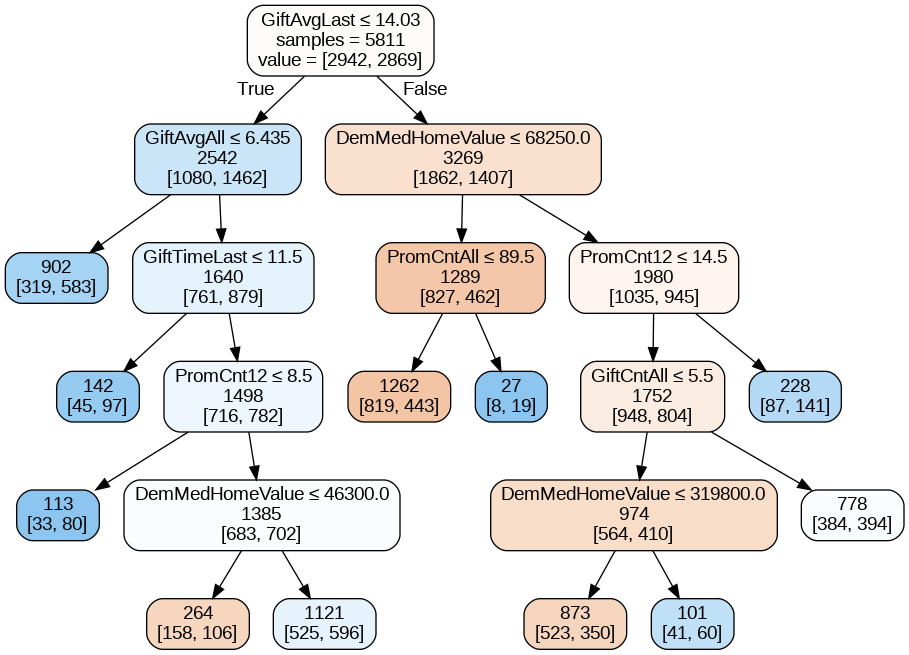

In [ ]:
plotDecisionTree(BestGridTree, feature_names=train_X.columns)

In [ ]:
classificationSummary(train_y,BestGridTree.predict(train_X))
classificationSummary(valid_y,BestGridTree.predict(valid_X))

Confusion Matrix (Accuracy 0.5971)

       Prediction
Actual    0    1
     0 1500 1442
     1  899 1970
Confusion Matrix (Accuracy 0.5554)

       Prediction
Actual    0    1
     0  891 1010
     1  713 1261


**Interpret your tree from Part C. What are the key insights you found?**


*   The charity program should focus on the donators that the last amount of gift (GiftAvgLast) is less than 14.03, (since is the best variable that first splits the dataset), and the gift average for all months is less than 6.435.






# 2. Random Forest Model


* Create a random forest using 500 estimators.

* Calculate the accuracy for both the training and validation data.

* Generate a table of importance values.  Graph the importances for the independent variables.  Which variables are the most important factors when determining the probability of donation?

In [ ]:
rf = RandomForestClassifier(random_state=301314500, n_estimators=500)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=301314500)

### Accuracy training and validation

In [ ]:
classificationSummary(train_y, rf.predict(train_X))
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2942    0
     1    0 2869
Confusion Matrix (Accuracy 0.5499)

       Prediction
Actual    0    1
     0 1124  777
     1  967 1007


### Table of Importance

               feature  importance       std
20         DemGender_U    0.006348  0.002126
18  StatusCatStarAll_1    0.009224  0.002802
21      DemHomeOwner_U    0.013420  0.002987
19         DemGender_M    0.014175  0.003152
12       PromCntCard12    0.019483  0.004195
2        GiftCntCard36    0.026912  0.005662
0            GiftCnt36    0.032427  0.006947
13       PromCntCard36    0.037850  0.005970
3       GiftCntCardAll    0.041327  0.007018
9            PromCnt12    0.042080  0.005934
1           GiftCntAll    0.045015  0.007035
4          GiftAvgLast    0.046064  0.008057
14      PromCntCardAll    0.046859  0.006553
10           PromCnt36    0.051211  0.007130
7         GiftTimeLast    0.051479  0.006812
11          PromCntAll    0.062247  0.007866
8        GiftTimeFirst    0.063627  0.008631
5            GiftAvg36    0.064957  0.009613
17        DemMedIncome    0.074071  0.007807
16      DemPctVeterans    0.076521  0.008188
6           GiftAvgAll    0.077508  0.011306
15     Dem

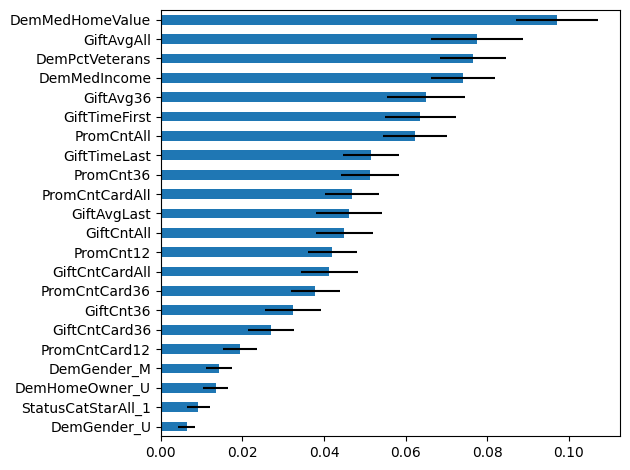

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

**Which variables are the most important factors when determining the probability of donation?**


*   The most important variable to predict donators are: DemMedIncome, DemPctVeterans, GiftAvgAll, DemMedHomeValue

# 3. Logistic Regression

*   Create a logistic regression.  Use C=1e42
*   Calculate the accuracy of the model for both training and validation data.
*   Create a table of coefficients and odds ratios for the independent variables.  Sort the table by odds ratios.
*   Interpret the two variables with the highest odds ratios.
*   Interpret the two variables with the lowest odds ratios.
*   If you did not interpret any categorical variables in the preceeding two steps, interpret two dummy variables.

In [ ]:
logit_reg = LogisticRegression(solver ='liblinear',C=1e42, random_state=301314500)
logit_reg.fit(train_X,train_y)

LogisticRegression(C=1e+42, random_state=301314500, solver='liblinear')

### Accucary Training and Validation

In [ ]:
classificationSummary(train_y,logit_reg.predict(train_X))
classificationSummary(valid_y,logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.5820)

       Prediction
Actual    0    1
     0 1892 1050
     1 1379 1490
Confusion Matrix (Accuracy 0.5711)

       Prediction
Actual    0    1
     0 1214  687
     1  975  999


### Odd Ratios Table

In [ ]:
Odds = pd.DataFrame({'variable': X.columns,'coef': logit_reg.coef_[0],'odds': np.e**logit_reg.coef_[0]})
Odds = Odds.sort_values(by='odds',ascending=False)
Odds

,variable,coef,odds
13,PromCntCard36,2.298579e-02,1.023252
0,GiftCnt36,1.957474e-02,1.019768
2,GiftCntCard36,1.793666e-02,1.018098
1,GiftCntAll,1.528063e-02,1.015398
3,GiftCntCardAll,1.288949e-02,1.012973
8,GiftTimeFirst,6.951344e-03,1.006976
9,PromCnt12,4.019855e-03,1.004028
6,GiftAvgAll,3.631395e-03,1.003638
10,PromCnt36,2.993699e-03,1.002998
18,StatusCatStarAll_1,2.660576e-03,1.002664


**Interpret the two variables with the highest odds ratios.**

*   PromCntCard36: for every additional unit of gift count card in 36 months, a person is 2.325% more likely to donate.
* GiftCnt36: for every additional unit of gift count in 36 months, a person is 1.6798% more likely to donate.




**Interpret the two variables with the lowest odds ratios.**

*   PromCntAll: for every additional unit of promotion count all months, a person is 1.1215% less likely to donate.
* GiftTimeLast: for every additional unit of time since last gift, a person is 4.0181% less likely to donate.

**If you did not interpret any categorical variables in the preceeding two steps, interpret two dummy variables.**

*   DemHomeOwner_U: prospectors that do not own a house are 0.1346% less likely to donate than those who owns a house.
*  DemGender_M: prospectors that are males are 0.0187% less likely to donate than females

# 6. Model Evaluation

* Summarize your findings for the four models.  Include both the training and validation accuracies.

* Which modeling technique produced the most overfit model?  Which technique is the least overfit?

* In BA706, Applied Analytic Modeling, in SAS the best tree had a validation accuracy of 0.5730.  The full regression had a validation accuracy of 0.5680.  List at least two reasons why the models in this project perform worse.

* Which model would you choose and and why?

* What are the key findings from the model you chose that you would share with your stakeholders? (Use wording that a non-statistician would understand.)

**Summarize your findings for the four models. Include both the training and validation accuracies.**


*  ** Full tree:**

  Train Accuracy: 1.00

  valid Accuracy: 0.5185

  This model was the most overfit due to the use of every single variable and no restrictions for the model in the number of levels, the minimum split, and impurity.

* **Best Tree Cross Validation Gri Search:**

  Train Accuracy: 0.5971

  valid Accuracy: 0.5554

  With this model,   GiftAvgLast is the best split of the dataset when it is less than 14.03, and also, as a second splithe gift average for all months is less than 6.435, meaning that for the charity program is important to look into these variables and focus on those donators who have the characteristics.



* **Random Forest:**

  Train Accuracy: 1.00

  valid Accuracy: 0.5499

  According to the result of the random forest, the most important variables that affect donations are DemMedIncome, DemPctVeterans, GiftAvgAll, DemMedHomeValue. In other words, these features are the ones who have major impact on predicting if a person is going to donate or not, although this model is overfit, which means that with a completely new dataset it might not predict with accuracy, since the training and validation accucary diferd by 0.4501, so it is not reliable.

* **Logistic Regression:**

  Train Accuracy: 0.5820

  valid Accuracy: 0.5711

The most important features for this variable are PromCntCard36 and GiftCnt36.
 - for every additional unit of gift count card in 36 months, a person is 2.325% more likely to donate.

- for every additional unit of gift count in 36 months, a person is 1.6798% more likely to donate.



**Which modeling technique produced the most overfit model? Which technique is the least overfit?**


*  The most overfit was the full Classification tree with a training accucary of 1 and a valid accucary of 0.5169
* The least overfit model was the logistic regression with a training accucary of 0.5820 and a valid accucary of 0.5711



**In BA706, Applied Analytic Modeling, in SAS the best tree had a validation accuracy of 0.5730.  The full regression had a validation accuracy of 0.5680.  List at least two reasons why the models in this project perform worse.**


* 1. The full regression could be more accurate because of the data preprocessing in SAS, which in this project did not do such as the skewness, the impute, replacing the missing values instead of dropping since we can miss a lot of information out of it.
2. For the decision tree, in SAS has the pruning method which is measure the accuracy by cutting variables, in this case python does not do.



**Which model would you choose and and why?**


*  According to the results, I would choose the logistic regression since its the one more accurate and it is not overfit.



**What are the key findings from the model you chose that you would share with your stakeholders? (Use wording that a non-statistician would understand.)**


In order to predict the donators, the charity program should focus on the following characteristics:

- **PromCntCard36**: for every additional unit of gift count card in 36 months, a person is 2.325% more likely to donate.In other words, the more gift count car in 36 month a prospector have, the highest is the probability that this person is going to donate.
- **GiftCnt36**: for every additional unit of gift count in 36 months, a person is 1.6798% more likely to donate, meaning that gift count in 36 months affects positively the chances that a person donates.

Also, prospectors that do not own a house are 0.1346% less likely to donate than those who owns a house, so the program should focus more on those who hava a house. Furthermore, females are more likely to donate than males, with a 0.0187% of more probability.


